To make non-normal data to normally ditributed data..We need normally ditributed data as sometimes few models do MLE to deduce parametersand hence assume and underlying distribution , sometimes normal. So we need to convert non-normal distribution to normal.

Box-Cox transformation is parametrized by $\lambda$

$$\begin{equation*}
y(\lambda) = \left\{
        \begin{array}{ll}
            \frac{y^\lambda - 1}{\lambda} & \quad \lambda \neq 0 \\
            ln(\lambda) &  \quad \lambda = 0 
        \end{array}
    \right.
\end{equation*}
$$

Sometimes when data follows an exponential trend, then taking log transformation, data becomes normal. However, data may not have precisely and exponential trend. In that case box-cox helps.

In [1]:
### Let us generate some non-normal distribution of data! 

import numpy as np
np.random.seed(144)
x_beta = np.random.beta (a=2, b = 10, size = 10000)

(array([ 608., 1131., 1403., 1437., 1189., 1064.,  919.,  657.,  504.,
         347.,  258.,  183.,  131.,   72.,   45.,   31.,   11.,    4.,
           3.,    3.]),
 array([0.00215198, 0.03562139, 0.06909081, 0.10256022, 0.13602964,
        0.16949905, 0.20296847, 0.23643788, 0.2699073 , 0.30337671,
        0.33684613, 0.37031554, 0.40378496, 0.43725437, 0.47072379,
        0.5041932 , 0.53766262, 0.57113203, 0.60460145, 0.63807086,
        0.67154028]),
 <BarContainer object of 20 artists>)

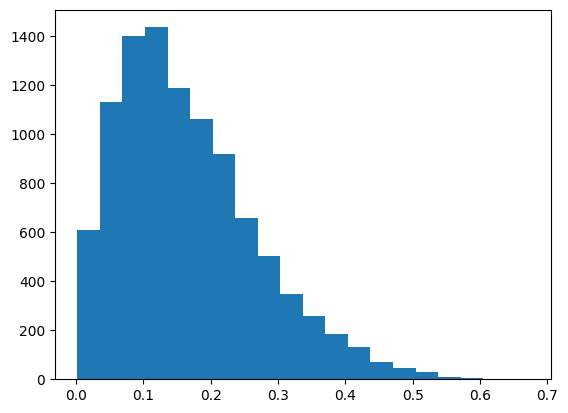

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.pyplot.hist(x_beta, bins=20)

In [3]:
## Let us do box cox transform
lambda_ = 0.8
x_lambda = (np.power(x_beta,lambda_) -1.0)/lambda_

(array([ 191.,  610.,  873., 1124., 1222., 1215., 1023.,  999.,  801.,
         612.,  458.,  302.,  224.,  162.,   87.,   56.,   26.,    8.,
           3.,    4.]),
 array([-1.24081286, -1.19582182, -1.15083078, -1.10583974, -1.0608487 ,
        -1.01585766, -0.97086663, -0.92587559, -0.88088455, -0.83589351,
        -0.79090247, -0.74591143, -0.70092039, -0.65592935, -0.61093831,
        -0.56594728, -0.52095624, -0.4759652 , -0.43097416, -0.38598312,
        -0.34099208]),
 <BarContainer object of 20 artists>)

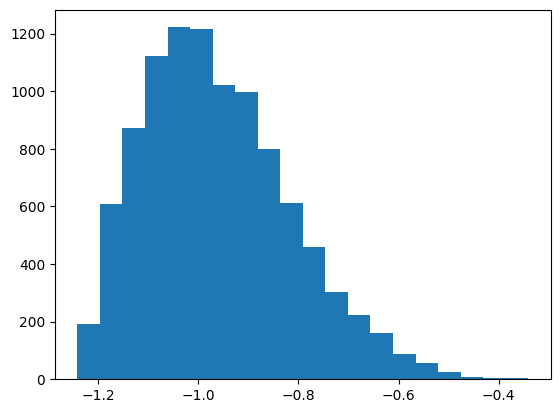

In [4]:
matplotlib.pyplot.hist(x_lambda, bins=20)

In [5]:
from scipy.stats import boxcox

# Aply box cox
box_cox_data, lam = boxcox(x_beta)


In [6]:
lam

0.40610841381072876

In [7]:
box_cox_data

array([-1.73539112, -0.9276075 , -1.61308299, ..., -1.21671346,
       -0.98366863, -0.68098923])

(array([  16.,   48.,  106.,  225.,  387.,  519.,  734.,  923., 1086.,
        1174., 1075., 1099.,  904.,  688.,  446.,  307.,  165.,   77.,
          15.,    6.]),
 array([-2.25906684, -2.16449624, -2.06992563, -1.97535503, -1.88078442,
        -1.78621382, -1.69164321, -1.5970726 , -1.502502  , -1.40793139,
        -1.31336079, -1.21879018, -1.12421958, -1.02964897, -0.93507837,
        -0.84050776, -0.74593716, -0.65136655, -0.55679595, -0.46222534,
        -0.36765473]),
 <BarContainer object of 20 artists>)

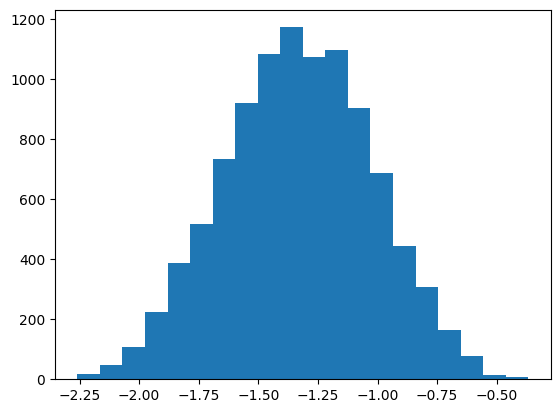

In [8]:
matplotlib.pyplot.hist(box_cox_data, bins=20)

In [9]:
(np.power(x_beta, lam) - 1.0)/lam

array([-1.73539112, -0.9276075 , -1.61308299, ..., -1.21671346,
       -0.98366863, -0.68098923])

In [10]:
box_cox_data

array([-1.73539112, -0.9276075 , -1.61308299, ..., -1.21671346,
       -0.98366863, -0.68098923])

We can see that applying the box cox transformation produced more normal looking data. Lambda = 0.40610841381072876
by the library. 

Should I try deriving it? lets see

In [44]:
def transform(data, lambda_):
    assert lambda_ != 0, "Error : an invalid lambda"
    return (np.power(data, lambda_) - 1.0)/lambda_

$ ll = n \cdot log( \frac{1}{\sqrt{2\pi}} ) - n \cdot log(\sigma) - \sum_{1}^{n} \frac{(x_i - \mu)^2}{2\sigma^2}$

$ll = -n/2 \cdot log( 2 \pi ) - n \cdot log(\sigma) - \sum_{1}^{n} \frac{(x_i - \mu)^2}{2\sigma^2} $

Since  $\sigma^2 = (1/n)\sum_{1}^{n} (x_i - \mu)^2$

$ll = -n/2 \cdot log( 2 \pi ) - n \cdot log(\sigma) - n/2 $

def ll(data):
    n       = len(data)
    mu_hat  = np.mean(data)
    var_hat = np.sum(np.power(data - mu_hat, 2.0))/n
    sd_hat  = np.sqrt(var_hat)
    #
    term1 = (-n/2.0) * np.log()
    LL = ( -n * np.log(np.sqrt(2 * np.pi)) )
    LL = LL - n * np.log(sd)
    LL = LL - n/2.0
    return LL
    

In [36]:
ll(data = x_beta)

8472.927520719639

In [37]:
ll(data = transform(x_beta, 0.3))

-4655.537822116516

In [38]:
ll(data = transform(x_beta, 0.4))

-2591.3004616195376

In [41]:
ll(data = transform(x_beta, 0.5))

-598.2459681089858

In [42]:
ll(data = transform(x_beta, 0.9))

6764.189621043026

In [43]:
ll(data = transform(x_beta, 0.8))

5006.3402597382355